In [1]:
using TaylorIntegration, Plots, TaylorSeries, LaTeXStrings

In [2]:
@taylorize function three_body_restricted_with_momentum!(du::Vector{T}, u::Vector{T}, p, t) where T
    x, y, p_x, p_y, μ = u

    x_plus_mu = x + μ
    x_minus_one_plus_mu = x - (1 - μ)
    r1 = sqrt(x_plus_mu^2 + y^2)
    r2 = sqrt(x_minus_one_plus_mu^2 + y^2)

    r1_cubed = r1^3
    r2_cubed = r2^3

    # Ecuaciones de movimiento
    du[1] = p_x + y  
    du[2] = p_y - x  

    du[3] = -(1 - μ) * (x_plus_mu) / (r1_cubed) - ( μ * (x_minus_one_plus_mu) / r2_cubed ) + p_y  
    du[4] = -(1 - μ) * y / r1_cubed - μ * y / r2_cubed - p_x  

    du[5] = zero(μ)  # μ permanece constante
end

In [419]:
# Configuración inicial
x0, y0, vx0, vy0  = 0.48765, -0.86602, 0.86602, 0.48765
μ0 = 0.2 # mu cerca de L5
initial_conditions = [x0, y0, vx0, vy0, μ0]
t0 = 0.0
tend = 50.0
step = 0.1
time_vector = t0:step:tend
order = 20
abstol = 1e-20

1.0e-20

In [420]:
1/81

0.012345679012345678

In [421]:
d1 = taylorinteg(three_body_restricted_with_momentum!, initial_conditions, time_vector, order, abstol; maxsteps=900000)

tspan: (0.0, 50.0), x: 5 Float64 variables

In [422]:
d1.x

501×5 transpose(::Matrix{Float64}) with eltype Float64:
  0.48765   -0.86602   0.86602    0.48765   0.2
  0.488409  -0.866731  0.881436   0.47366   0.2
  0.49049   -0.869071  0.895452   0.457971  0.2
  0.493572  -0.873328  0.90799    0.440494  0.2
  0.497298  -0.87977   0.918985   0.42115   0.2
  0.501281  -0.888631  0.928372   0.399873  0.2
  0.505103  -0.900112  0.936092   0.376617  0.2
  0.508326  -0.914375  0.942087   0.351365  0.2
  0.51049   -0.931535  0.946301   0.324128  0.2
  0.511119  -0.95166   0.948676   0.294957  0.2
  ⋮                                         
 -0.931539  -0.87108   1.05675   -0.352005  0.2
 -0.909739  -0.816909  1.06595   -0.406348  0.2
 -0.881983  -0.770477  1.07535   -0.456991  0.2
 -0.849002  -0.731933  1.08553   -0.503086  0.2
 -0.811481  -0.701261  1.09704   -0.543665  0.2
 -0.770046  -0.67828   1.11023   -0.577644  0.2
 -0.725277  -0.662633  1.12517   -0.603865  0.2
 -0.677718  -0.653794  1.14155   -0.621192  0.2
 -0.627909  -0.651075  1.15855   -0

In [423]:
plotly()

Plots.PlotlyBackend()

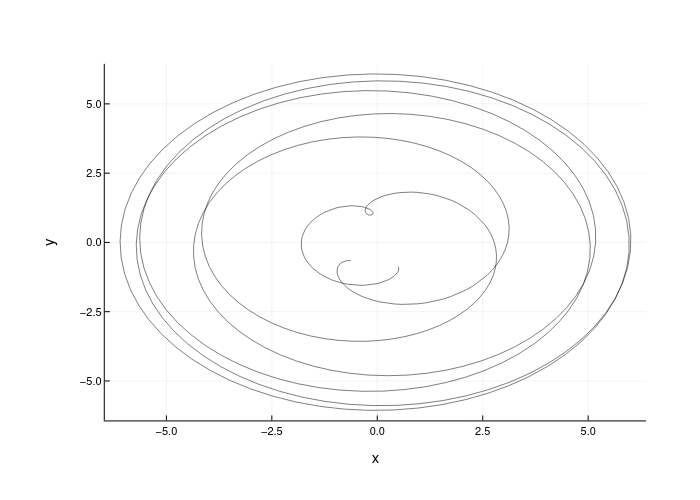

In [424]:
plot(d1.x[:,1], d1.x[:,2], label="", color=:black, alpha=0.5, xlabel="x", ylabel="y")  

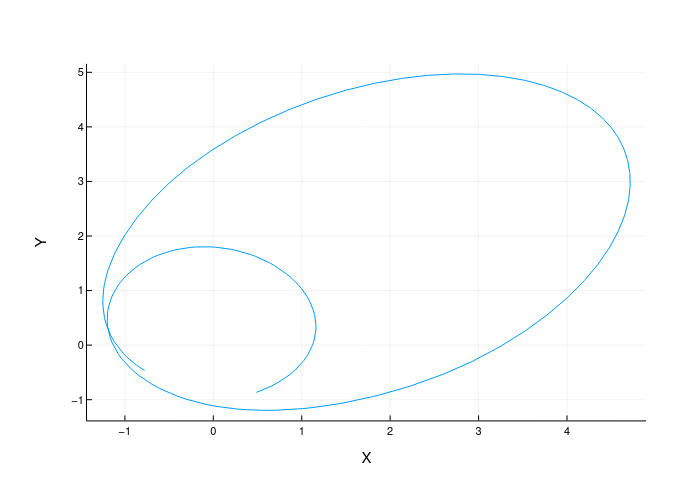

In [425]:
t = time_vector
x_inercial = @. d1.x[:,1]*cos(t) - d1.x[:,2]*sin(t)
y_inercial = @. d1.x[:,1]*sin(t) + d1.x[:,2]*cos(t)

plot(x_inercial, y_inercial, label="", xlabel="X", ylabel="Y")

In [320]:
@taylorize function three_body_restricted_param!(du::Vector{T}, u::Vector{T}, p, t) where T
    x, y, v_x, v_y, μ = u

    x_plus_mu = x + μ
    x_minus_one_plus_mu = x - 1 + μ
    one_minus_mu = 1 - μ  

    r1 = sqrt(x_plus_mu^2 + y^2)
    r2 = sqrt(x_minus_one_plus_mu^2 + y^2)

    r1_cubed = r1^3
    r2_cubed = r2^3

    du[1] = v_x
    du[2] = v_y
    du[3] = (2v_y + x) - (one_minus_mu * x_plus_mu / r1_cubed + μ * x_minus_one_plus_mu / r2_cubed)
    du[4] = (-2v_x + y) - (one_minus_mu * y / r1_cubed + μ * y / r2_cubed)
    du[5] = zero(μ)
end

In [445]:
# Configuración inicial
x0, y0, vx0, vy0  = 0.48765, -0.86602, 0.0, 0.0
μ0 = 0.01234/25 # mu cerca de L5
initial_conditions2 = [x0, y0, vx0, vy0, μ0]
t0 = 0.0
tend = 600.0
step = 0.1
time_vector = t0:step:tend
order = 20
abstol = 1e-20

1.0e-20

In [327]:
d2 = taylorinteg(three_body_restricted_param!, initial_conditions2, time_vector, order, abstol; maxsteps=90000)

tspan: (0.0, 600.0), x: 5 Float64 variables

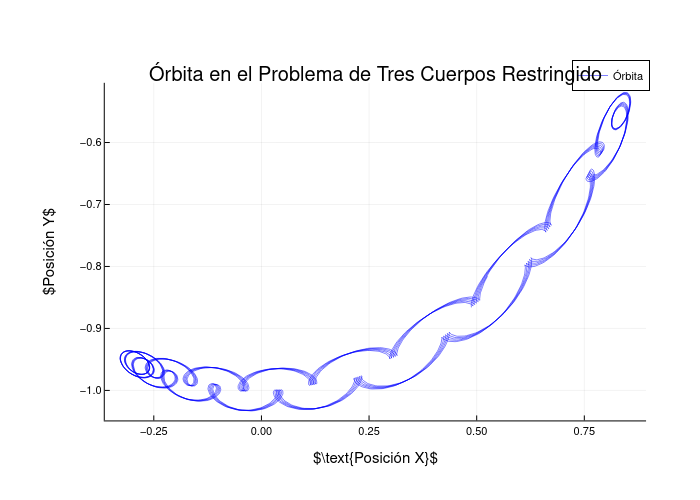

In [433]:
# Crear un plot más estético
plot(
    d2.x[:, 1], d2.x[:, 2], 
    label = "Órbita", 
    color = :blue, 
    linewidth = 0.5, 
    alpha = 1.0,
    lineStyle = :solid
)

# Mejoras estéticas adicionales
title!("Órbita en el Problema de Tres Cuerpos Restringido")
xlabel!(L"\text{Posición X}")
ylabel!(L"Posición Y")

In [437]:
gr()

Plots.GRBackend()

In [462]:

# Crear el gráfico con alta resolución
p = plot(
    d2.x[:, 1], d2.x[:, 2], 
    label = "Órbita", 
    color = :blue, 
    linewidth = 0.8, 
    alpha = 0.8,
    linestyle = :solid,
    title = "Órbita marco de referencia no inercial",
    xlabel = "Posición x",
    ylabel = "Posición y",
    aspect_ratio = :equal,
    grid = false,
    legend = :bottomright,
    dpi = 300  # Establecer la resolución a 300 dpi
)

# Guardar el gráfico en formato PNG
savefig(p, "orbita_alta_resolucion.png")



"/home/marco/GitHub/SS/Jet Transport Implementación/orbita_alta_resolucion.png"

In [463]:
# Definir los vectores x_inercial y y_inercial
t = time_vector
x_inercial = @. d2.x[:,1]*cos(t) - d2.x[:,2]*sin(t)
y_inercial = @. d2.x[:,1]*sin(t) + d2.x[:,2]*cos(t)

# Crear el gráfico con alta resolución
p = plot(
    x_inercial, y_inercial, 
    label = "Órbita", 
    color = :blue, 
    linewidth = 0.1, 
    alpha = 1.8,
    title = "Órbita marco de referencia inercial",
    linestyle = :solid,
    xlabel = "X",
    ylabel = "Y",
    aspect_ratio = :equal,
    grid = false,
    legend = :bottomright,
    dpi = 300  # Establecer la resolución a 300 dpi
)

# Guardar el gráfico en formato PNG
savefig(p, "orbita_inercial_alta_resolucion.png")


"/home/marco/GitHub/SS/Jet Transport Implementación/orbita_inercial_alta_resolucion.png"